# Conceptual:

### Question1:


Bad key "text.kerning_factor" on line 4 in
/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


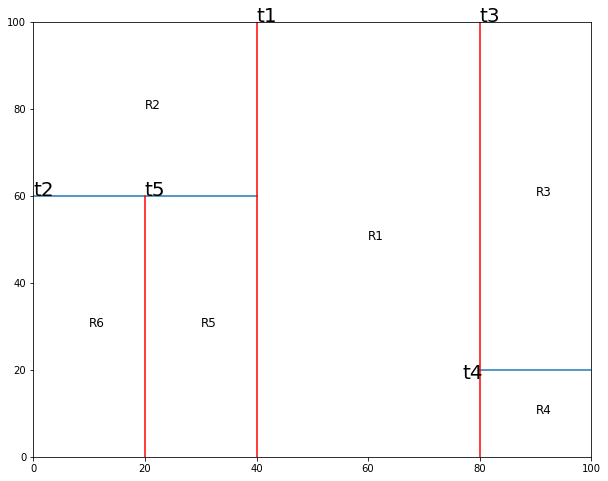

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.axhline(y=60,xmax=0.4)
plt.axhline(y=20,xmin=0.8,xmax=1)
plt.axvline(x=20,ymax=0.6,color='red')
plt.axvline(x=40,ymax=1,color='red')
plt.axvline(x=80,ymax=1,color='red')
plt.text(x=60,y=50,s='R1',fontsize=12)
plt.text(x=20,y=80,s='R2',fontsize=12)
plt.text(x=90,y=60,s='R3',fontsize=12)
plt.text(x=90,y=10,s='R4',fontsize=12)
plt.text(x=30,y=30,s='R5',fontsize=12)
plt.text(x=10,y=30,s='R6',fontsize=12)
plt.text(x=40,y=100,s='t1',fontsize=20)
plt.text(x=80,y=100,s='t3',fontsize=20)
plt.text(x=0,y=60,s='t2',fontsize=20)
plt.text(x=77,y=18,s='t4',fontsize=20)
plt.text(x=20,y=60,s='t5',fontsize=20)

plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

### Question2:

###### We first set $\hat{f}=0$ and $r_{i}=y_{i}$ for all i in the training set.
###### And as the function of the tree is:
$$ f(X)=\sum_{m=1}^{M} c_{m}.1_{X\in R_{m}}  $$
###### And for the stump the equation is:
$$𝑓(𝑋)=c_{1}⋅1_{(𝑋∈𝑅1)}+c_{2}⋅1_{(𝑋∈𝑅2)} $$
$$=\begin{cases}
c_{1}, & \text{if }X<\text{ S} \\
c_{2}, & \text{if }X>\text{ S}
\end{cases}$$
###### So the 1st tree will have the function:
$$ \hat{f}^1(𝑋)=c_{1}⋅𝐼(𝑋_{𝑗1}<s_{1})+c_{2}⋅𝐼(𝑋_{𝑗1}≥s_{1}) $$
###### And for the second tree $\hat{f}=0+\lambda\hat{f}^1(𝑋)$ and $r_{i}=y_{i}-\lambda\hat{f}^1(𝑋)$
$$ \hat{f}^2(𝑋)=c_{1}⋅𝐼(𝑋_{𝑗2}<s_{2})+c_{2}⋅𝐼(𝑋_{𝑗2}≥s_{2}) $$
###### So $\hat{f}=0+\lambda\hat{f}^1(𝑋)+\lambda\hat{f}^2(𝑋)$ and $r_{i}=y_{i}-\lambda\hat{f}^1(𝑋)-\lambda\hat{f}^2(𝑋)$
###### So boosting using depth-one trees (or stumps) will leadf to a function with th form:
$$\hat{f}=\lambda\hat{f}^1(𝑋)+\lambda\hat{f}^2(𝑋)+---------+\lambda\hat{f}^\beta(𝑋)$$
###### Which shows it is an additive model of the form:
$$\hat{f}=\lambda\sum_{j=1}^{p}f_{j}(X_{j})$$

### Question3:

/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


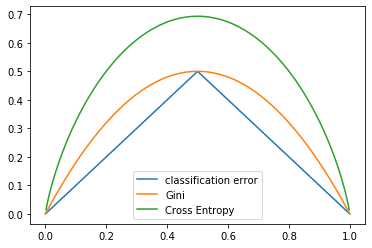

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x= np.linspace(0,1,500)
y_classification_err = [1-max(i,1-i) for i in x ]
y_gini=2*x*(1-x)
y_cross_entropy=-1*((x*np.log(x))+((1-x)*np.log((1-x))))
plt.plot(x,y_classification_err,label='classification error')
plt.plot(x,y_gini,label='Gini')
plt.plot(x,y_cross_entropy,label='Cross Entropy')
plt.legend()
plt.show()

### Question4:

![tree_question](tree_question.jpg) 

### Question5:

###### With the majority vote approach: 
- Result:X is Red as it is the most commonly occurring class among the 10 predictions (6 for Red vs 4 for Green).



###### With the average probability approach: 
- Result: X is Green as the average of the 10 probabilities is 0.45 for the red class.


### Question6:

1. we do recursive binary splitting on the data. This is a top-down approach where recursively and greedily we find the best single partitioning of the data such that the reduction of RSS is the greatest. This process is applied to each of the split parts seperately until some minimal number of observations is present on each of the leaves.

2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of α.
3. Use K-fold cross-validation to choose α. That is, divide the training observations into K folds. For each k = 1, . . . , K:

a)  Repeat Steps 1 and 2 on all but the kth fold of the training data. 

b) Evaluate the mean squared prediction error on the data in the left-out kth fold, as a function of α.

c) Average the results for each value of α, and pick α to minimize theaverage error.

4. Return the subtree from Step 2 that corresponds to the chosen value of α.


# Applied:

### Question7:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)
%matplotlib inline

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
boston_df = pd.read_csv('csv/Boston.csv') 
boston_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [6]:
X_df = boston_df.drop('medv',axis=1)
y_df = boston_df['medv']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [8]:
RF_25 = RandomForestRegressor(n_estimators=25, max_features=6, oob_score=True)
RF_25.fit(X_train,y_train)

RandomForestRegressor(max_features=6, n_estimators=25, oob_score=True)

In [9]:
RF_500 = RandomForestRegressor(n_estimators=500, max_features=6, oob_score=True)
RF_500.fit(X_train,y_train)

RandomForestRegressor(max_features=6, n_estimators=500, oob_score=True)

In [10]:
y_pred_25 = RF_25.predict(X_test)
print(mean_squared_error(y_test,y_pred_25))

8.493354352941179


In [11]:
y_pred_500 = RF_500.predict(X_test)
print(mean_squared_error(y_test,y_pred_500))

8.424184209803956


In [12]:
def random_forest_ntree(X_train, Y_train, X_test, Y_test, nTrees, max_feature):
    test_MSE = {}
    for nTree in nTrees:
        rf = RandomForestRegressor(max_features=max_feature, n_estimators=nTree,min_samples_leaf=10)
        rf.fit(X_train, Y_train)
        p = rf.predict(X_test)
        test_MSE[nTree] = mean_squared_error(p, Y_test)
    return test_MSE
predictors =len(X_df.columns)


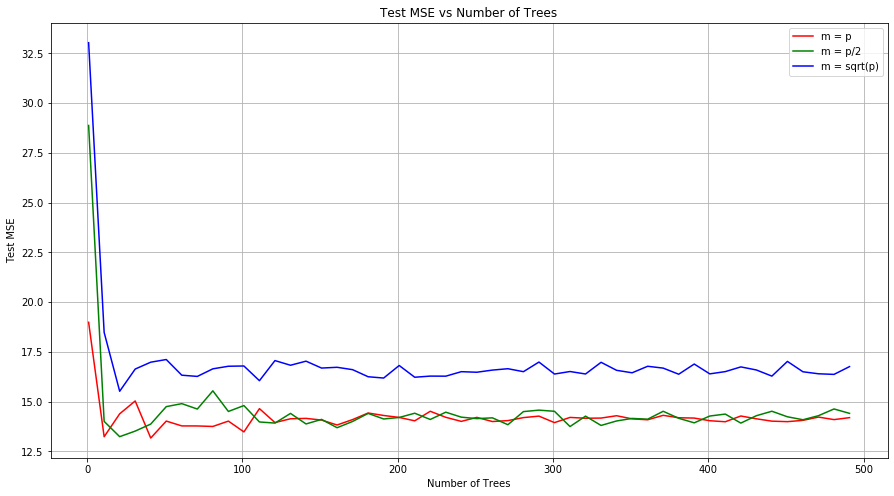

In [13]:
test_MSE_p = random_forest_ntree(X_train, y_train, X_test, y_test, np.arange(1,500,10), predictors)
test_MSE_pby2 = random_forest_ntree(X_train, y_train, X_test, y_test, np.arange(1,500,10), int(predictors/2))
test_MSE_psqrt = random_forest_ntree(X_train, y_train, X_test, y_test, np.arange(1,500,10), int(np.sqrt(predictors)))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

lists = sorted(test_MSE_p.items())
x, y = zip(*lists)
plt.plot(x, y, color='r', label='m = p')

lists = sorted(test_MSE_pby2.items())
x, y = zip(*lists)
plt.plot(x, y, color='g', label='m = p/2')

lists = sorted(test_MSE_psqrt.items())
x, y = zip(*lists)
plt.plot(x, y, color='b', label='m = sqrt(p)')

ax.set_xlabel('Number of Trees')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Number of Trees')

plt.grid(b=True)
plt.legend(loc='best')
plt.show()

We may see that the Test MSE is very high for a single tree, it decreases as the number of trees increases. Also the Test MSE for the square root of the number of predictors is higher than for half the predictors or all of the predictors.

### Question8:

A)

In [14]:
carseats_df = pd.read_csv('csv/Carseats.csv')
carseats_df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [15]:
carseats_df['US'] = carseats_df['US'].map({'Yes': 1, 'No': 0})
carseats_df['Urban'] = carseats_df['Urban'].map({'Yes': 1, 'No': 0})
carseats_df = pd.get_dummies(carseats_df, prefix=['ShelveLoc'])

In [16]:
X_df = carseats_df.drop('Sales',axis=1)
y_df = carseats_df['Sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

B)

In [18]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree


regressor = DecisionTreeRegressor(min_samples_leaf=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=5)

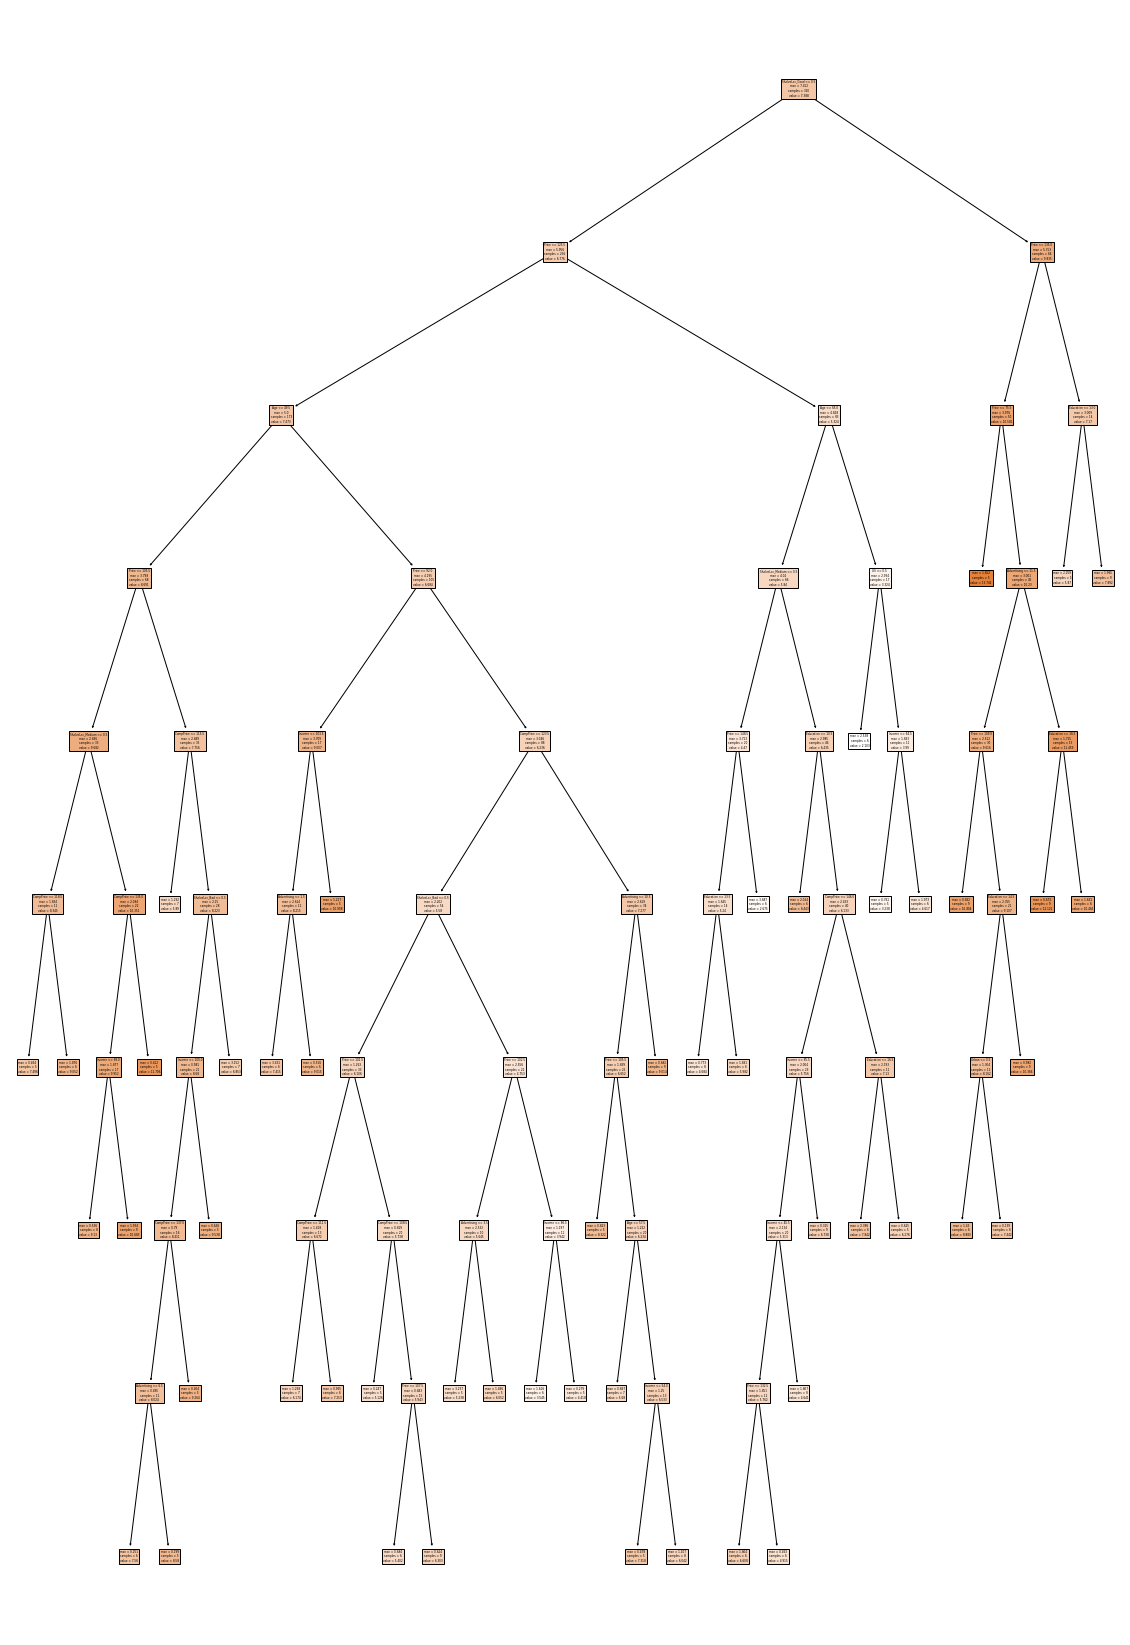

In [19]:
fig = plt.figure(figsize=(20,30))
_ = tree.plot_tree(regressor, feature_names=X_df.columns, filled=True)

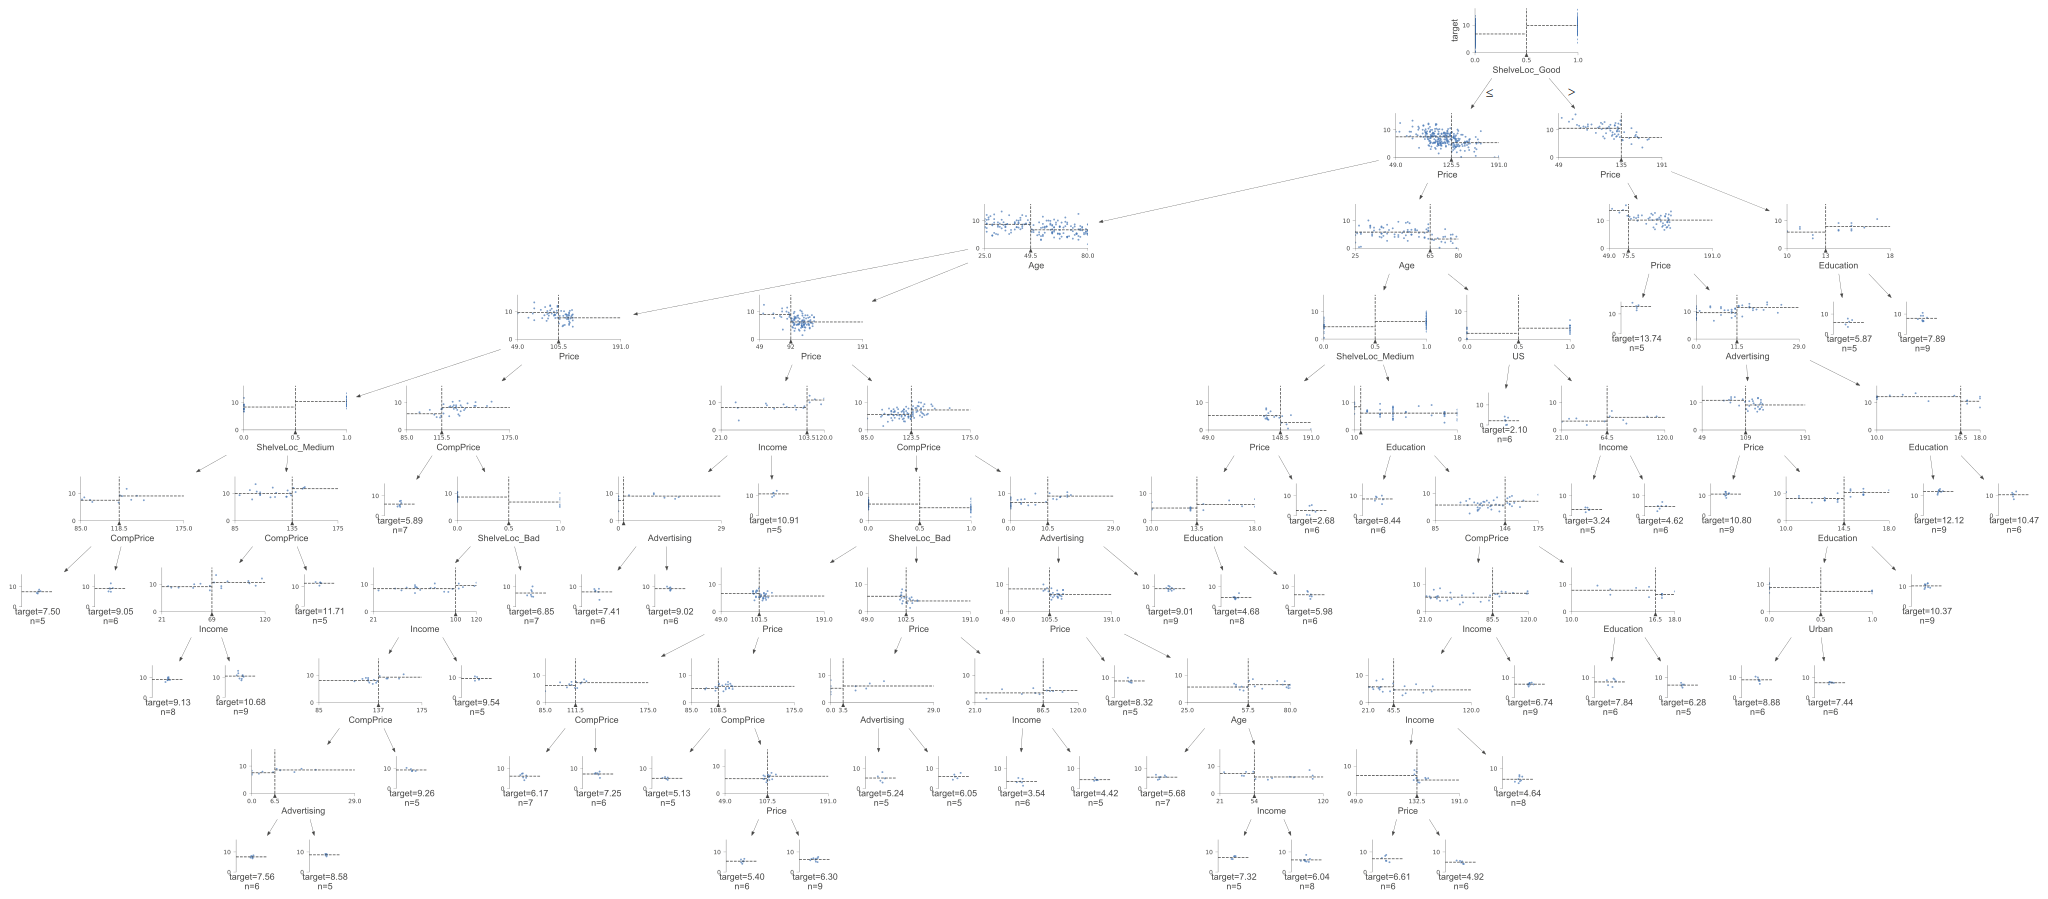

In [20]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regressor, X_train, y_train,
                target_name="target",
                feature_names=X_df.columns)
viz

In [21]:
y_pred = regressor.predict(X_test)
print("Test MSE is: " + str(mean_squared_error(y_pred, y_test)))

Test MSE is: 5.482107729858159


C)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

parameters = {'max_depth':range(1,30)}
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
clf = GridSearchCV(DecisionTreeRegressor(random_state=0,min_samples_leaf=5), parameters, cv=5,scoring=mse_scorer,return_train_score=True)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

-5.121475760720607 {'max_depth': 7}


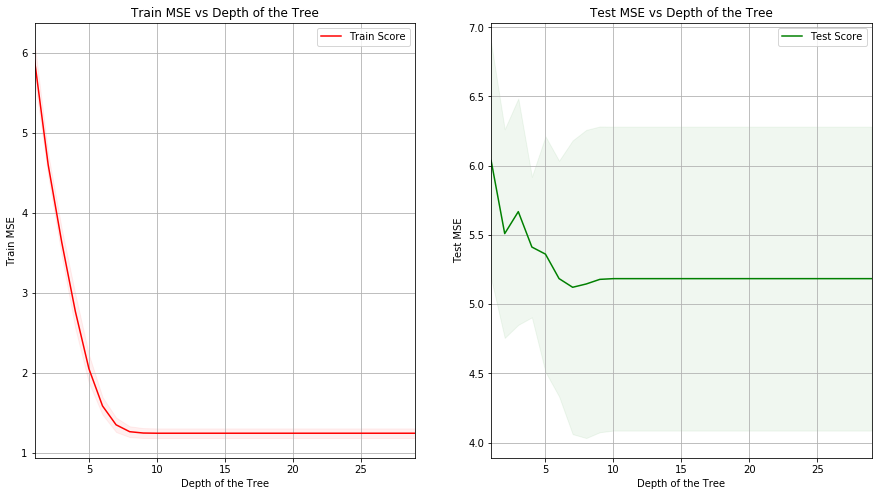

In [23]:
test_MSE = {}
test_MSE_std = {}
train_MSE = {}
train_MSE_std = {}
for idx, pm in enumerate(clf.cv_results_['param_max_depth'].data):
    test_MSE[pm] = abs(clf.cv_results_['mean_test_score'][idx]) # Taking absolute value as returned value of MSE is negative
    test_MSE_std[pm] = clf.cv_results_['std_test_score'][idx]
    train_MSE[pm] = abs(clf.cv_results_['mean_train_score'][idx])
    train_MSE_std[pm] = clf.cv_results_['std_train_score'][idx]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
lists = sorted(train_MSE.items())
x, y = zip(*lists)

lists = sorted(train_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='r', label='Train Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="r")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Train MSE')
ax.set_title('Train MSE vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()
plt.legend()



ax = fig.add_subplot(122)
lists = sorted(test_MSE.items())
x, y = zip(*lists)

lists = sorted(test_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='g', label='Test Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="g")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()


plt.legend()
plt.show()

#### 2nd way:

In [24]:
clf = DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)


Text(0, 0.5, 'total impurity of leaves')

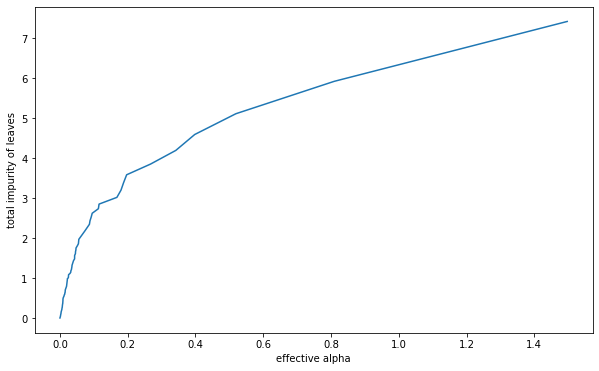

In [25]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [26]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha,min_samples_leaf=10)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

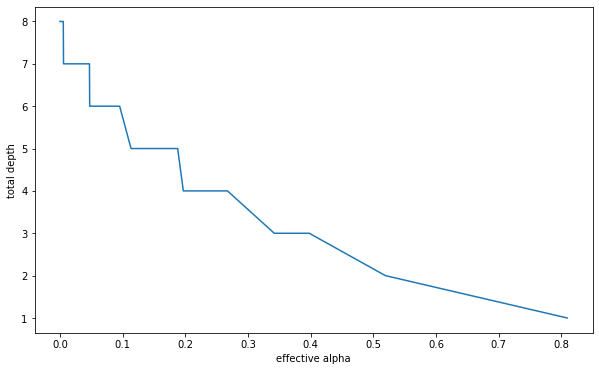

In [27]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'MSE error')

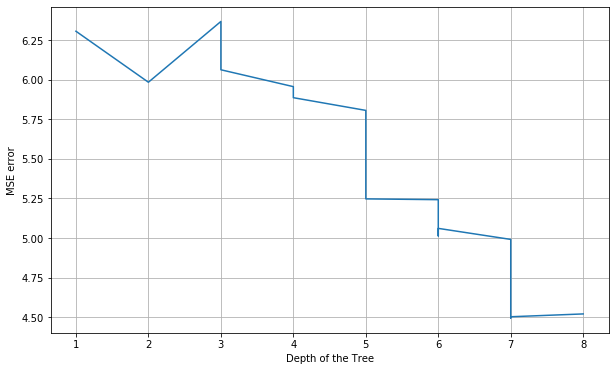

In [28]:
mse_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(tree_depths[:-1], mse_scores[:-1])
plt.xlabel("Depth of the Tree")
plt.ylabel("MSE error")

In [29]:
print("Max depth for tree: ",tree_depths[mse_scores.index(min(mse_scores))])

Max depth for tree:  7


In [30]:
print("Value of alpha is: ",ccp_alphas[mse_scores.index(min(mse_scores))])

Value of alpha is:  0.019485026041666045


So let's try the regression tree with max depth we got from the 2 ways:

In [31]:
Dtr = DecisionTreeRegressor(random_state=0,max_depth=7)
Dtr.fit(X_train,y_train)
y_pred = Dtr.predict(X_test)
print("Test MSE is: " + str(mean_squared_error(y_pred, y_test)))

Test MSE is: 4.9448845537465145


###### We may see that pruning the tree decreases the Test MSE to 4.944 from 5.482.



D)

In [32]:
from sklearn.ensemble import BaggingRegressor


In [33]:
def bagging_ntree(X_train, Y_train, X_test, Y_test, nTrees):
    test_MSE = {}
    oob_score = {}
    for nTree in nTrees:
        rf = BaggingRegressor(oob_score=True, n_estimators=nTree)
        rf.fit(X_train, Y_train)
        p = rf.predict(X_test)
        test_MSE[nTree] = mean_squared_error(p, Y_test)
        oob_score[nTree] = 1-rf.oob_score_
    return oob_score,test_MSE

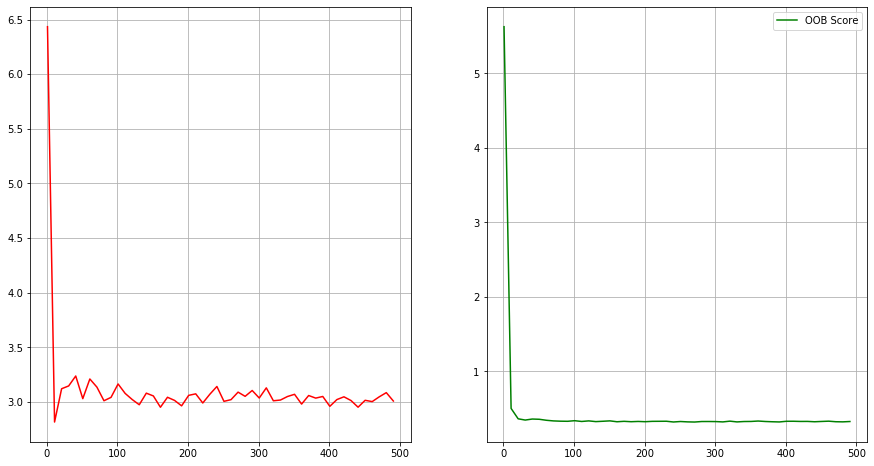

In [34]:
oob_score,test_MSE = bagging_ntree(X_train, y_train, X_test, y_test, np.arange(1,500,10))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

lists = sorted(test_MSE.items())
x, y = zip(*lists)
ax.plot(x, y, color='r', label='Test error')
ax.grid(b=True)

ax = fig.add_subplot(122)
lists = sorted(oob_score.items())
x, y = zip(*lists)
ax.plot(x, y, color='g', label='OOB Score')


plt.grid(b=True)
plt.legend(loc='best')
plt.show()

In [35]:
BR = BaggingRegressor(n_estimators=50)
BR.fit(X_train,y_train)
y_pred = BR.predict(X_test)
print("Test error using baggin is: ",mean_squared_error(y_test,y_pred))

Test error using baggin is:  2.9297501935


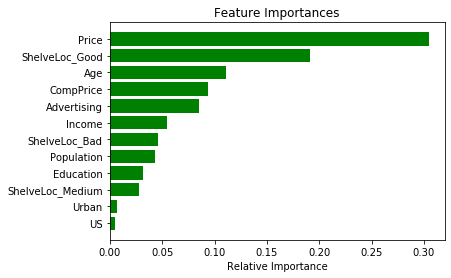

In [36]:
features = list(X_test.columns)
importances = feature_importances = np.mean([tree.feature_importances_ for tree in BR.estimators_], axis=0)
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

E)

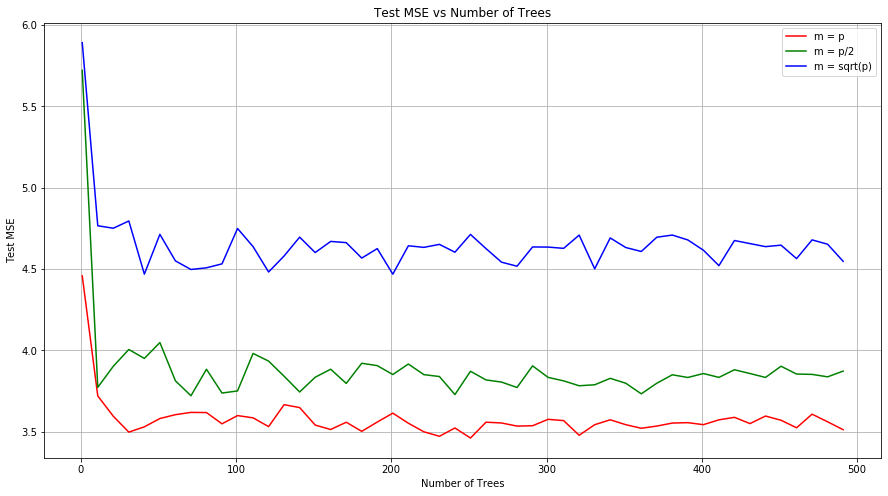

In [37]:
predictors =len(X_df.columns)
test_MSE_p = random_forest_ntree(X_train, y_train, X_test, y_test, np.arange(1,500,10), predictors)
test_MSE_pby2 = random_forest_ntree(X_train, y_train, X_test, y_test, np.arange(1,500,10), int(predictors/2))
test_MSE_psqrt = random_forest_ntree(X_train, y_train, X_test, y_test, np.arange(1,500,10), int(np.sqrt(predictors)))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

lists = sorted(test_MSE_p.items())
x, y = zip(*lists)
plt.plot(x, y, color='r', label='m = p')

lists = sorted(test_MSE_pby2.items())
x, y = zip(*lists)
plt.plot(x, y, color='g', label='m = p/2')

lists = sorted(test_MSE_psqrt.items())
x, y = zip(*lists)
plt.plot(x, y, color='b', label='m = sqrt(p)')

ax.set_xlabel('Number of Trees')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Number of Trees')

plt.grid(b=True)
plt.legend(loc='best')
plt.show()

number of predictors = p

number of Trees = 80

In [38]:
rf = RandomForestRegressor(max_features=predictors, n_estimators=80,min_samples_leaf=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Test error using Random Forest is: ",mean_squared_error(y_test,y_pred))

Test error using Random Forest is:  3.5222442854345375


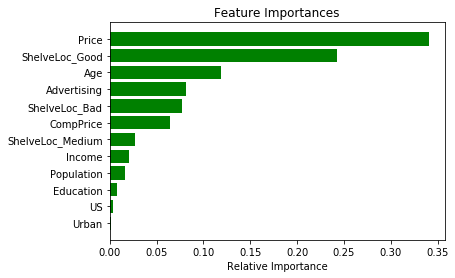

In [39]:
features = list(X_test.columns)
importances = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

F)

In [40]:
from bartpy.sklearnmodel import SklearnModel
model = SklearnModel()
model.fit(X_train, y_train.to_numpy()) 


y_pred = model.predict(X_test) 


In [41]:
print("Test error using BART is: ",mean_squared_error(y_test,y_pred))

Test error using BART is:  1.4000865204396753


###### As we can see the test error with BART is approximately half of the best test error we could get using the previous models and also without any tuning which shows that BART is a very powerful model.

### Question9:

A)

In [105]:
oj_df = pd.read_csv("csv/OJ.csv")
np.random.seed(0)
oj_df['Store7'] = oj_df['Store7'].map({'Yes': 1, 'No': 0})
oj_df.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0          0          0  0.500000         1.99         1.75       0.24   
1          0          1  0.600000         1.69         1.75      -0.06   
2          0          0  0.680000         2.09         1.69       0.40   
3          0          0  0.400000         1.69         1.69       0.00   
4          0          0  0.956535         1.69         1.69       0.00   

   Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0       0   0.000000   0.000000           0.24      1  
1       0   0.150754   0.000000           0.24      1  
2       0   0.000000   0.091398           0.23      1  
3       0   0.000000   0.000000           0.00      1  
4       1   0.000000   0.000000           0.00      0

In [106]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(oj_df.Purchase)
oj_df['target'] = label_encoder.transform(oj_df.Purchase)

In [107]:
X_df = oj_df.drop(['Purchase','target'], axis=1)
y_df = oj_df['target']
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df , train_size=800)

B)

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(random_state=0, min_samples_leaf=15)
classifier.fit(X_train, y_train)
print("Training Error rate is: " + str(1 - accuracy_score(classifier.predict(X_train), y_train)))

Training Error rate is: 0.14625


In [111]:
features = list(X_test.columns)
feature_importances = classifier.feature_importances_
indices = np.argsort(feature_importances)

In [112]:
print([features[i] for i in indices])

['DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'SalePriceCH', 'PctDiscCH', 'Store7', 'PctDiscMM', 'PriceMM', 'PriceCH', 'STORE', 'SalePriceMM', 'ListPriceDiff', 'StoreID', 'WeekofPurchase', 'PriceDiff', 'LoyalCH']


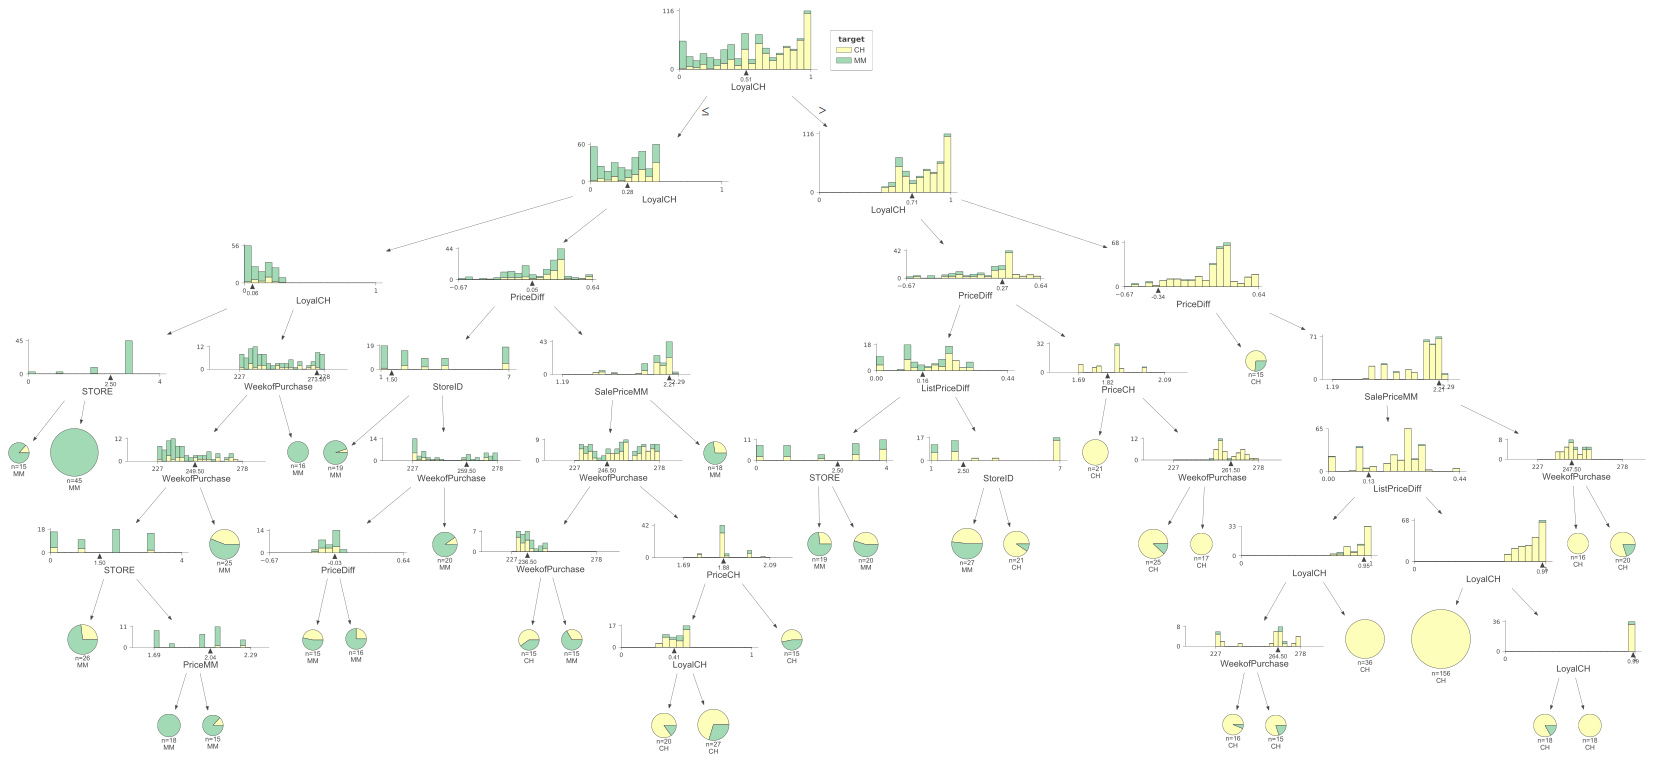

In [113]:
viz = dtreeviz(classifier, X_train, y_train,
                target_name="target",
                feature_names=X_train.columns,
                class_names=list(label_encoder.classes_))

viz

In [114]:
n_nodes = classifier.tree_.node_count
print("Number of terminal nodes is: ", n_nodes)

Number of terminal nodes is:  65


C)

D)

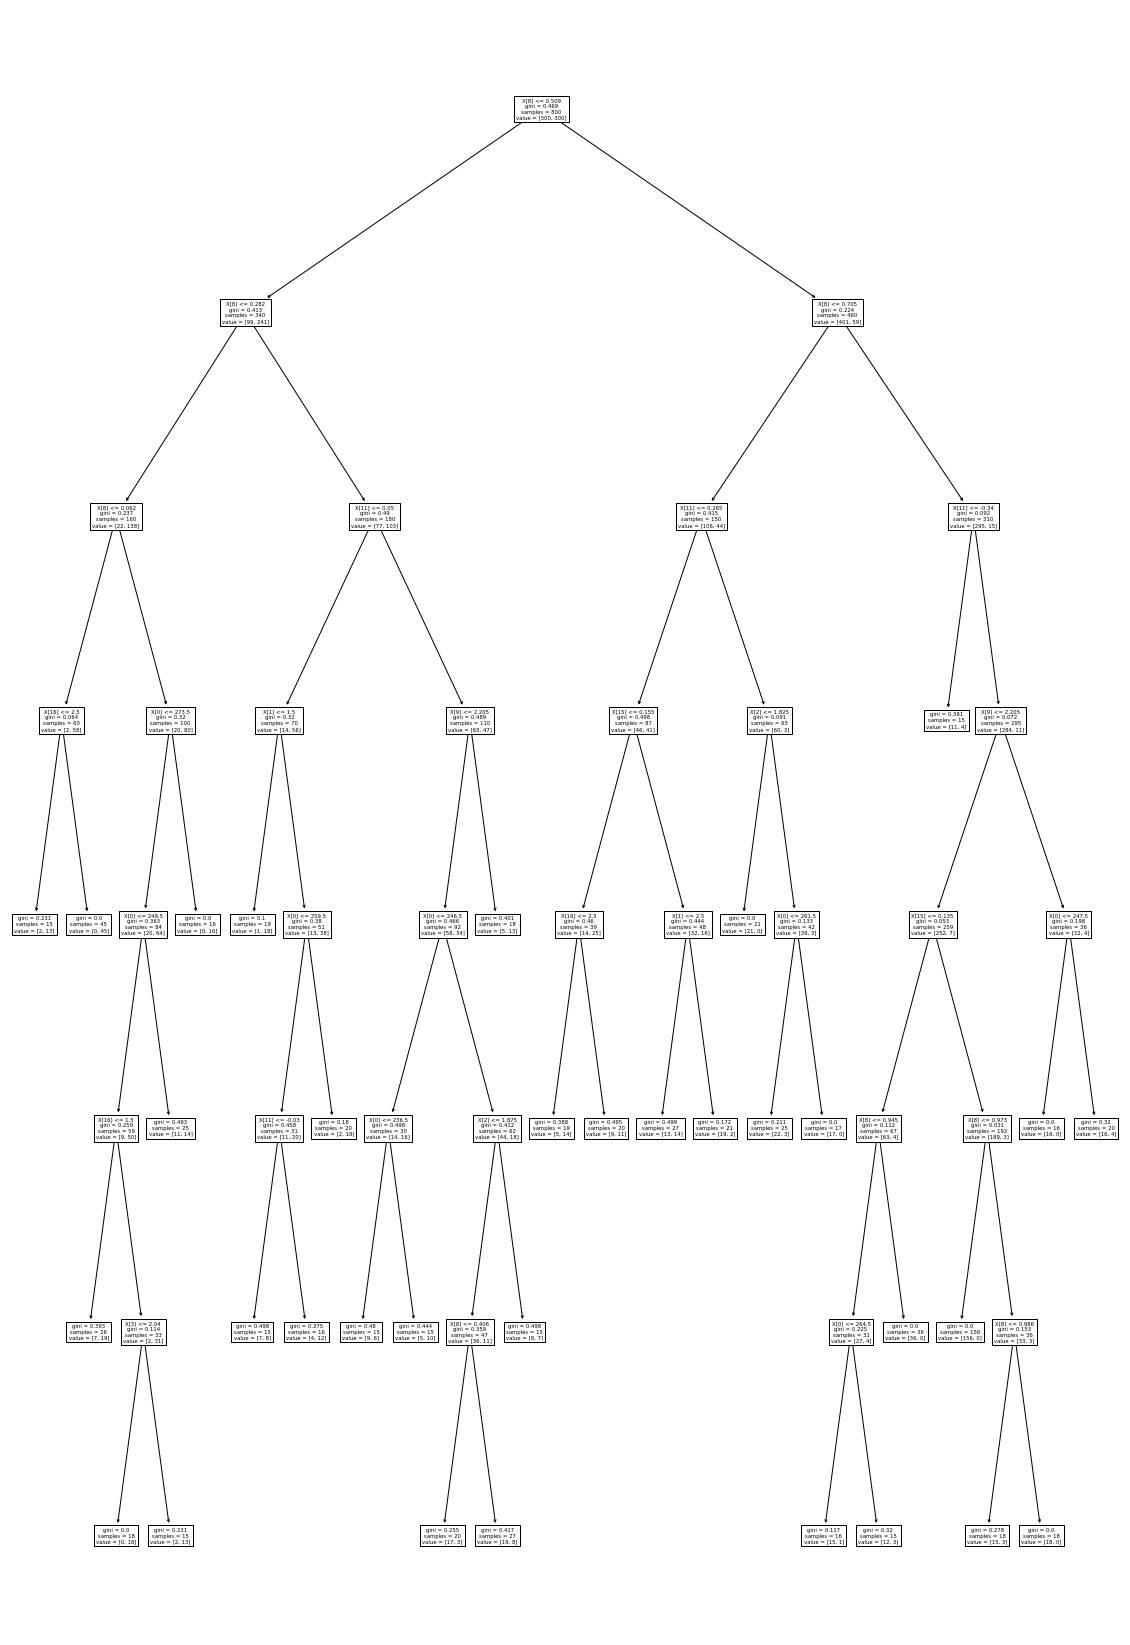

In [115]:
fig = plt.figure(figsize=(20,30))
tree.plot_tree(classifier)
plt.show()

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))


[[117  25]
 [ 36  92]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       153
           1       0.72      0.79      0.75       117

    accuracy                           0.77       270
   macro avg       0.77      0.78      0.77       270
weighted avg       0.78      0.77      0.77       270



In [117]:
print("Test Error rate is: " + str(1 - accuracy_score(y_pred, y_test)))

Test Error rate is: 0.22592592592592597


F)

In [118]:
from sklearn.metrics import f1_score

In [119]:
parameters = {'max_depth':range(1,30)}
f1_scorer = make_scorer(f1_score, greater_is_better=True)
clf = GridSearchCV(DecisionTreeClassifier(random_state=0,min_samples_leaf=5), parameters,scoring=f1_scorer, cv=5,return_train_score=True)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.7314532916109177 {'max_depth': 5}


G)

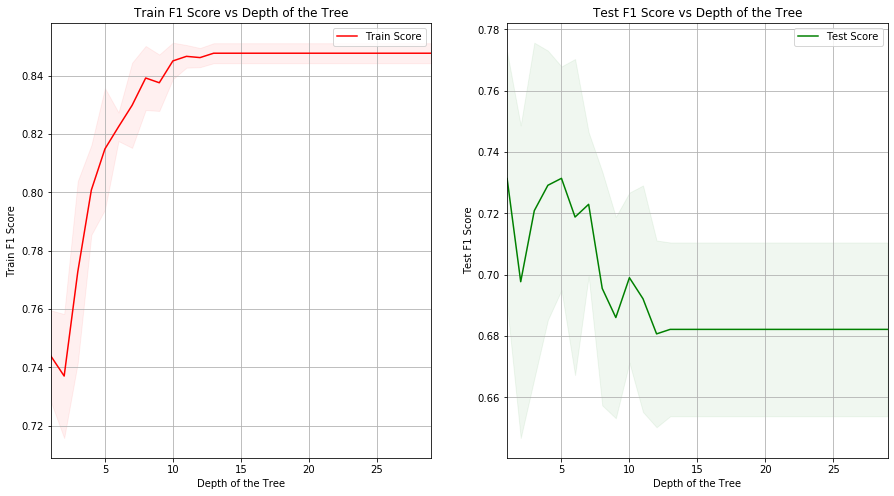

In [120]:
test_MSE = {}
test_MSE_std = {}
train_MSE = {}
train_MSE_std = {}
for idx, pm in enumerate(clf.cv_results_['param_max_depth'].data):
    test_MSE[pm] = abs(clf.cv_results_['mean_test_score'][idx]) 
    test_MSE_std[pm] = clf.cv_results_['std_test_score'][idx]
    train_MSE[pm] = abs(clf.cv_results_['mean_train_score'][idx])
    train_MSE_std[pm] = clf.cv_results_['std_train_score'][idx]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
lists = sorted(train_MSE.items())
x, y = zip(*lists)

lists = sorted(train_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='r', label='Train Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="r")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Train F1 Score')
ax.set_title('Train F1 Score vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()
plt.legend()



ax = fig.add_subplot(122)
lists = sorted(test_MSE.items())
x, y = zip(*lists)

lists = sorted(test_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='g', label='Test Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="g")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Test F1 Score')
ax.set_title('Test F1 Score vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()


plt.legend()
plt.show()

H)

The optimal depth using F1 score is:  5

I)J)

In [121]:
classifier_purned = DecisionTreeClassifier(random_state=0, min_samples_leaf=15,max_depth=5)
classifier_purned.fit(X_train, y_train)
print("Training Error rate is: " + str(1 - accuracy_score(classifier_purned.predict(X_train), y_train)))

Training Error rate is: 0.15000000000000002


The misclassification training error rate is slightly higher for the pruned tree (0.15 vs 0.14625).

K)

In [122]:
y_pred = classifier_purned.predict(X_test)
print("Test Error rate is: " + str(1 - accuracy_score(y_pred, y_test)))

Test Error rate is: 0.2222222222222222


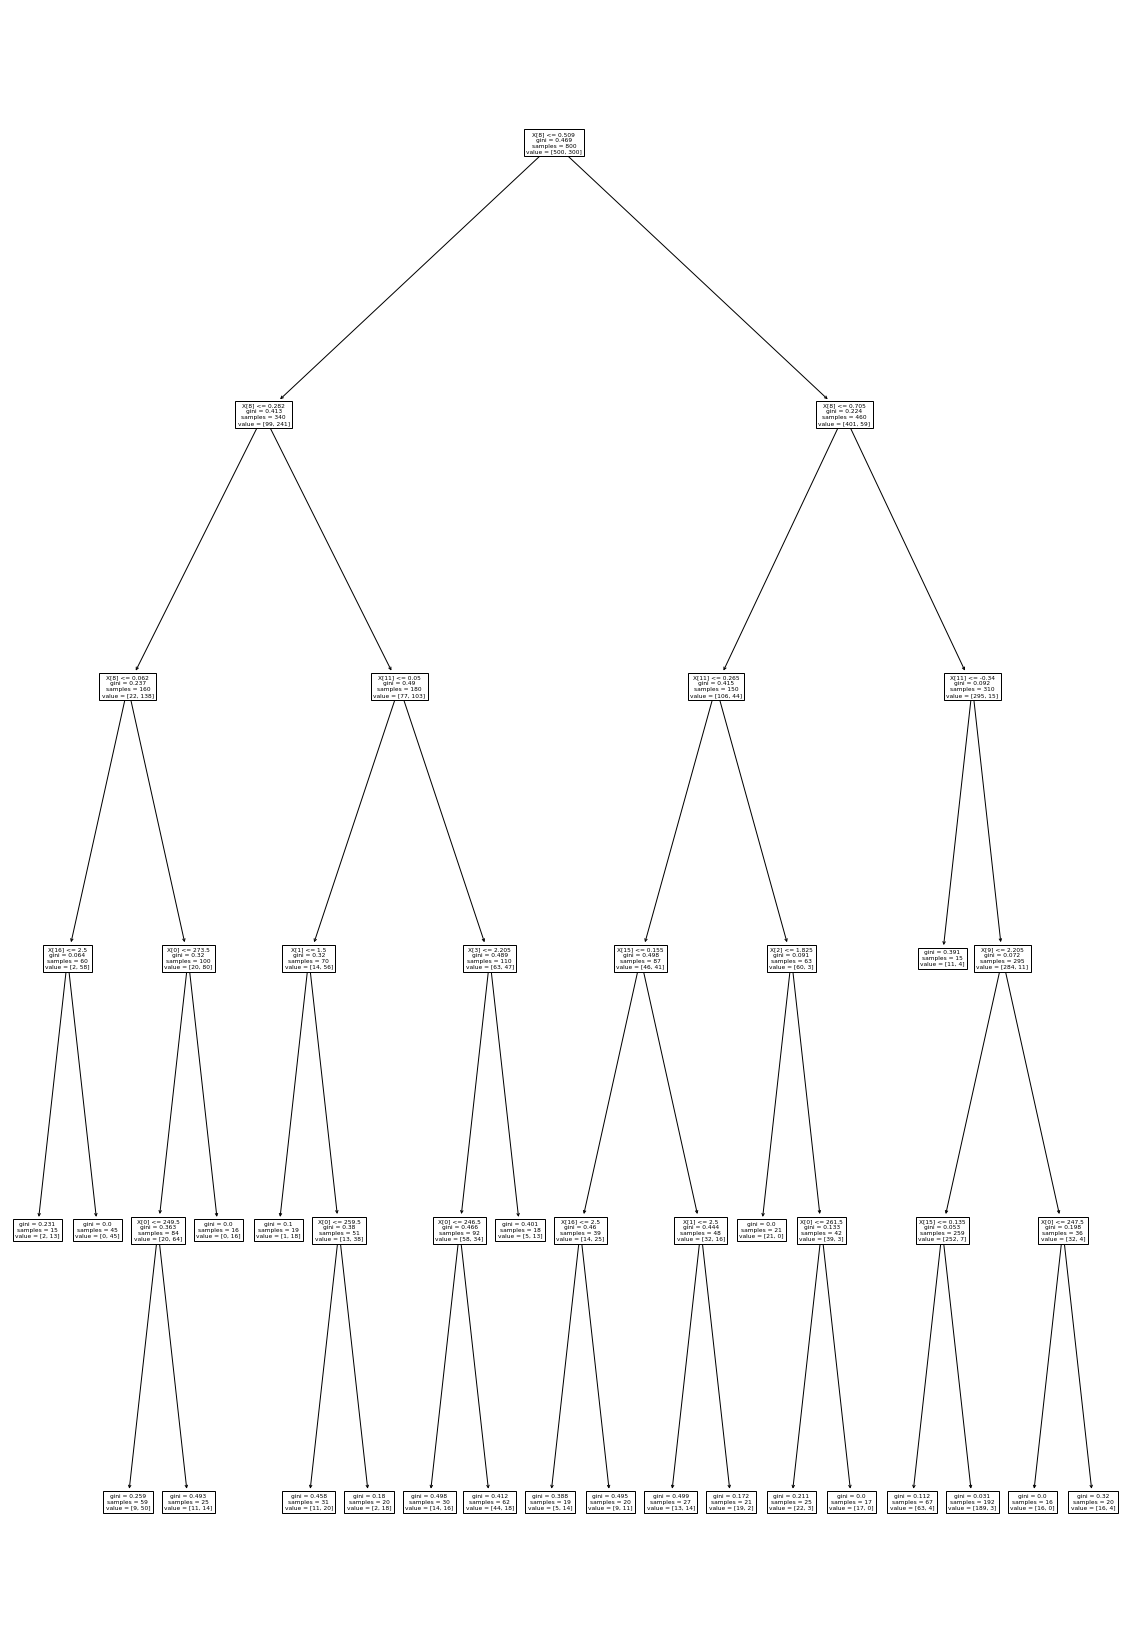

In [123]:
fig = plt.figure(figsize=(20,30))
tree.plot_tree(classifier_purned)
plt.show()

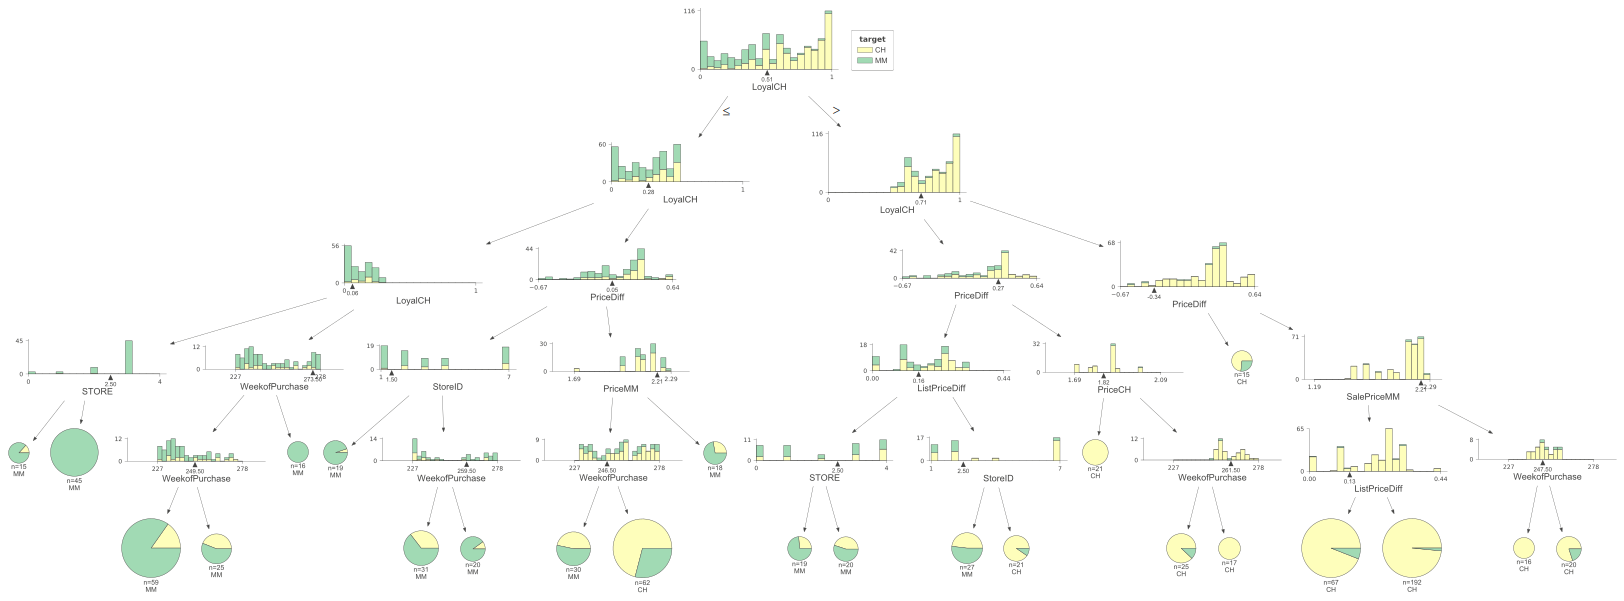

In [124]:
viz = dtreeviz(classifier_purned, X_train, y_train,
                target_name="target",
                feature_names=X_train.columns,
                class_names=list(label_encoder.classes_))

viz

The misclassification test error rate is also slightly lower for the pruned tree (0.222 vs 0.2259).

## Question10:

A)

In [60]:
hitters_df = pd.read_csv("csv/Hitters.csv")
hitters_df.head()

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0     NaN          A  
1   475.0          N  
2   480.0          A  
3   500.0          N  
4    91.5          N  

[5 rows x 21 columns]

In [61]:
hitters_df = hitters_df.rename(columns={'Unnamed: 0': 'Name'})
hitters_df = hitters_df.dropna()
hitters_df["Salary"] = hitters_df["Salary"].apply(np.log)
hitters_df['League'] = hitters_df['League'].map({'N': 1, 'A': 0})
hitters_df['NewLeague'] = hitters_df['NewLeague'].map({'N': 1, 'A': 0})
hitters_df['Division'] = hitters_df['Division'].map({'W': 1, 'E': 0})


B)

In [62]:
train_df = hitters_df.iloc[0:200, :]
test_df = hitters_df.iloc[200:, :]

C) & D)

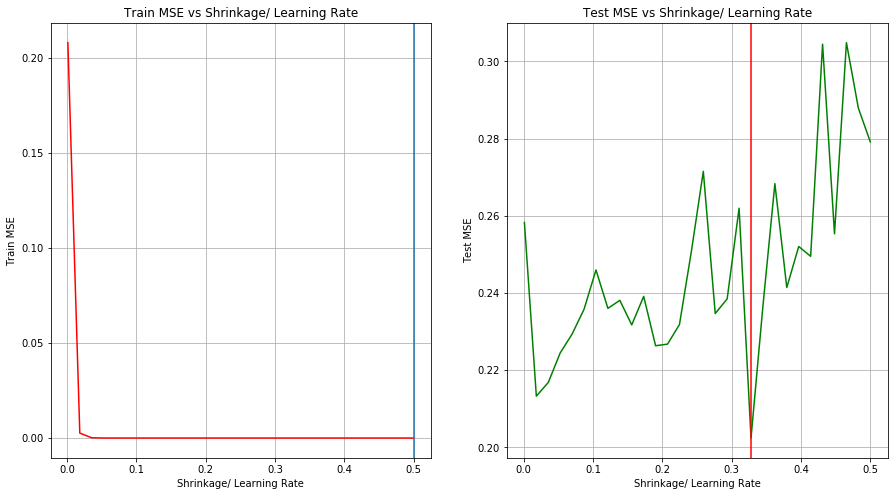

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

def boosting_shrinkage(X_train, Y_train, X_test, Y_test, shrinkages):
    train_MSE = {}
    test_MSE = {}
    for s in shrinkages:
        GBR = GradientBoostingRegressor(random_state=0, n_estimators=1000, learning_rate=s)
        GBR.fit(X_train, Y_train)
        y_pred = GBR.predict(X_train)
        train_MSE[s] = mean_squared_error(y_pred, Y_train)
        y_pred = GBR.predict(X_test)
        test_MSE[s] = mean_squared_error(y_pred, Y_test)
    return train_MSE, test_MSE

X_train = train_df.drop(['Name', 'Salary'], axis=1)
y_train = train_df[['Salary']]
X_test = test_df.drop(['Name', 'Salary'], axis=1)
y_test = test_df[['Salary']]

train_MSE,test_MSE = boosting_shrinkage(X_train, y_train, X_test, y_test,np.linspace(0.001, 0.5, 30))

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(121)
lists = sorted(train_MSE.items())
x, y = zip(*lists)
min_train = min(train_MSE, key=train_MSE.get)
plt.plot(x, y, color='r', label='Training Error')
plt.axvline(x=min_train)
ax.set_xlabel('Shrinkage/ Learning Rate')
ax.set_ylabel('Train MSE')
ax.set_title('Train MSE vs Shrinkage/ Learning Rate')
ax.grid()

ax = fig.add_subplot(122)
lists = sorted(test_MSE.items())
x, y = zip(*lists)
min_test = min(test_MSE, key=test_MSE.get)
plt.plot(x, y, color='g', label='Test Error')
plt.axvline(x=min_test,color='r')
ax.set_xlabel('Shrinkage/ Learning Rate')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Shrinkage/ Learning Rate')
ax.grid()

plt.grid(b=True)
plt.show()


In [64]:
test_MSE[min(test_MSE, key=test_MSE.get)]

0.20239439795607164

In [65]:
min(test_MSE, key=test_MSE.get)

0.3279310344827586

E)

In [66]:
# Linear regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

print('Minimum test MSE:', mean_squared_error(y_test, LR.predict(X_test)))


Minimum test MSE: 0.4917959375454934


In [67]:
# Cross-validated Ridge
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)

print('Minimum test MSE:', mean_squared_error(y_test, ridge.predict(X_test)))

Minimum test MSE: 0.4971436141039842


###### The test MSE for boosting is lower than for linear regression and ridge regression.

F)

In [68]:
GBR_best = GradientBoostingRegressor(random_state=0, n_estimators=1000, learning_rate=0.328)
GBR_best.fit(X_train, y_train)
y_pred = GBR_best.predict(X_test)
print("Test error using Gradient Boosting is: ",mean_squared_error(y_test,y_pred))

Test error using Gradient Boosting is:  0.2021529036332409


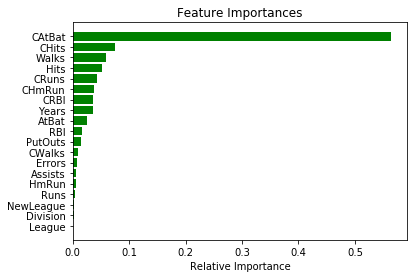

In [69]:
features = list(X_train.columns)
importances = GBR_best.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

G)

In [70]:
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)


BaggingRegressor()

In [71]:
print('Test MSE:', mean_squared_error(y_test, bagging.predict(X_test)))

Test MSE: 0.2232735109125827


###### The test MSE for bagging is 0.22, which is slightly lower than the test MSE for boosting 0.20.

## Question11:

In [72]:
caravan_df = pd.read_csv("csv/Caravan.csv")
caravan_df.head()

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        3         2         8       0       5       1   
1       37         1        2         2         8       1       4       1   
2       37         1        2         2         8       0       4       2   
3        9         1        3         3         3       2       3       2   
4       40         1        4         2        10       1       4       1   

   MGODGE  MRELGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       3       7  ...         0        0        0       1        0         0   
1       4       6  ...         0        0        0       1        0         0   
2       4       3  ...         0        0        0       1        0         0   
3       4       5  ...         0        0        0       1        0         0   
4       4       7  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  Purchase  
0       0        0         0        No  
1       0        0         0        No  
2       0        0         0        No  
3       0        0         0        No  
4       0        0         0        No  

[5 rows x 86 columns]

In [73]:
train_df = caravan_df.iloc[0:1000, :]
test_df = caravan_df.iloc[1000:, :]

In [74]:
X_train = train_df.drop(['Purchase'], axis=1)
y_train = train_df[['Purchase']]
X_test = test_df.drop(['Purchase'], axis=1)
y_test = test_df[['Purchase']]


B)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
GBR_ = GradientBoostingClassifier(random_state=0, n_estimators=1000, learning_rate=0.01)
GBR_.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=0)

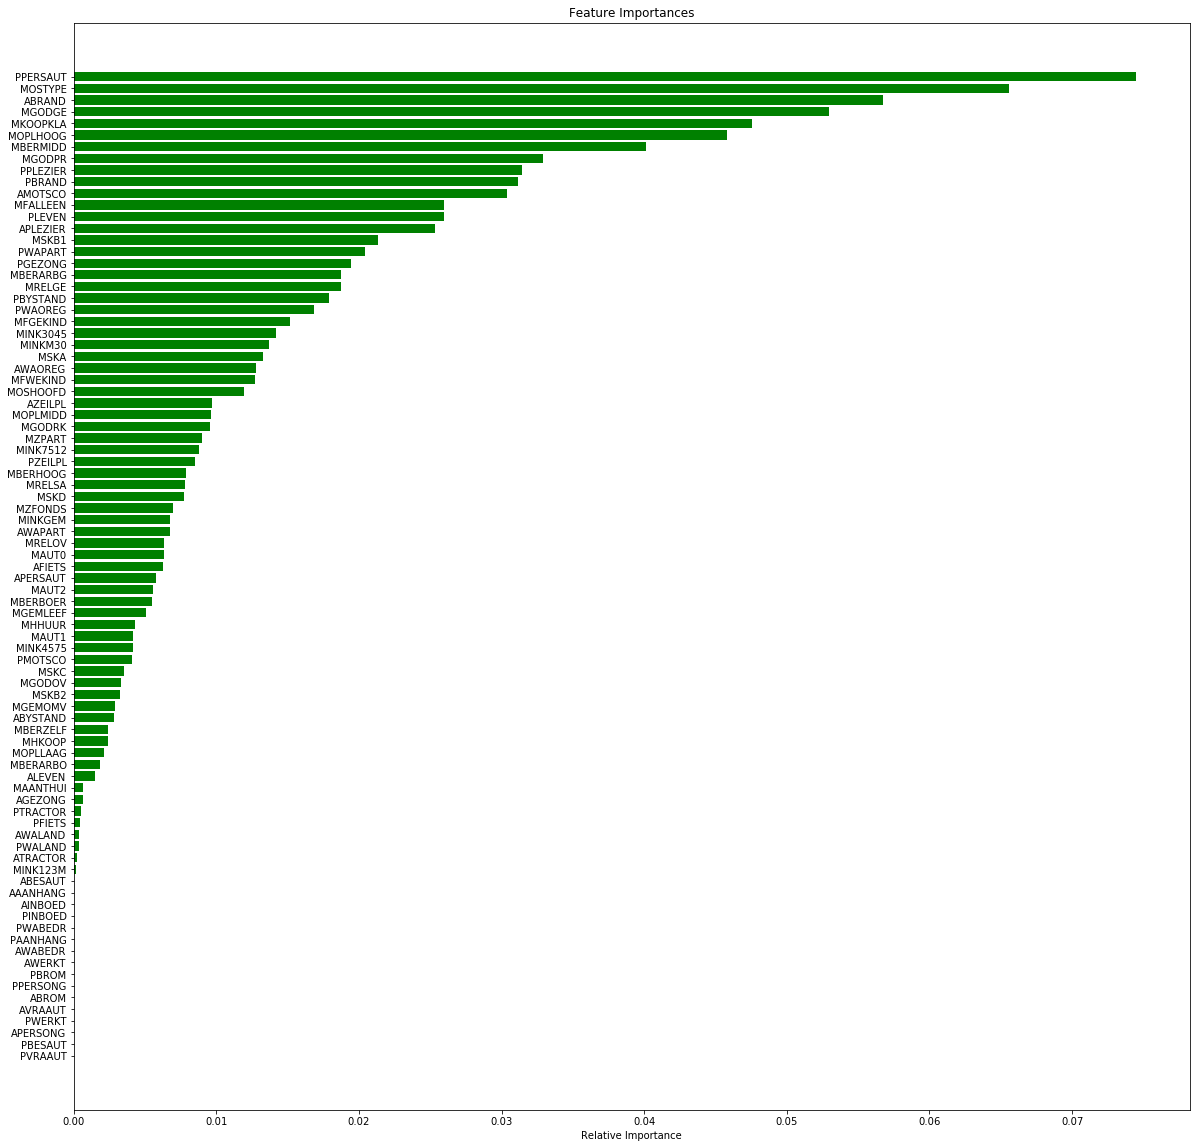

In [77]:
plt.figure(figsize=(20,20))
features = list(X_train.columns)
importances = GBR_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C)

In [78]:
y_pred = GBR_.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4489   44]
 [ 274   15]]
              precision    recall  f1-score   support

          No       0.94      0.99      0.97      4533
         Yes       0.25      0.05      0.09       289

    accuracy                           0.93      4822
   macro avg       0.60      0.52      0.53      4822
weighted avg       0.90      0.93      0.91      4822



In [81]:
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay

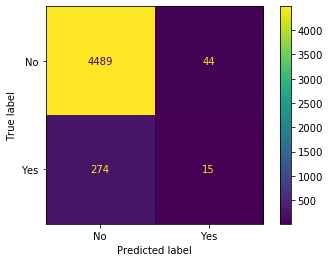

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=['No','Yes'])
disp.plot(values_format="2g");

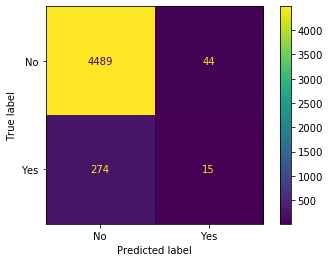

In [83]:
plot_confusion_matrix(GBR_, X_test, y_test)  
plt.show()

###### For boosting, the fraction of people predicted to make a purchase that in fact make one is 25.42%

In [84]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
y_pred_knn = KNN.predict(X_test)

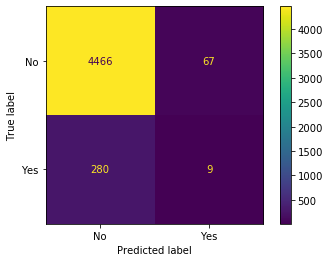

In [86]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn),display_labels=['No','Yes'])
disp.plot(values_format="2g");

###### For Knn, the fraction of people predicted to make a purchase that in fact make one is 11.84%

In [87]:
from sklearn.linear_model import LogisticRegression

Log_reg = LogisticRegression(random_state=0).fit(X_train,y_train)

y_pred_log = Log_reg.predict(X_test)

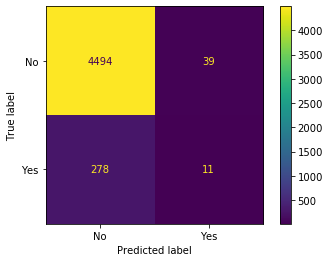

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_log),display_labels=['No','Yes'])
disp.plot(values_format="2g");

###### For Logistic regression, the fraction of people predicted to make a purchase that in fact make one is 22%

## Question12:

In [125]:
boston_df = pd.read_csv('csv/Boston.csv')

np.random.seed(0)
boston_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [126]:
X_df = boston_df.drop('crim',axis=1)
y_df = boston_df['crim']
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,random_state=0,test_size=0.25) 

#### Bagging:

In [127]:
Bag_reg =BaggingRegressor().fit(X_train,y_train)
y_pred_bag = Bag_reg.predict(X_test)
print("Test MSE for bagging is: ",mean_squared_error(y_test,y_pred_bag))

Test MSE for bagging is:  44.02798220954269


#### Boosting:

In [128]:
bos_reg = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_bos = bos_reg.predict(X_test)
print("Test MSE for boosting is: ",mean_squared_error(y_test,y_pred_bos))

Test MSE for boosting is:  47.278083904528685


#### Random Forests:

In [129]:
rf = RandomForestRegressor().fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("Test MSE for random forests is: ",mean_squared_error(y_test,y_pred_rf))

Test MSE for random forests is:  44.987161410988044


#### BART:

In [130]:
model = SklearnModel()
model.fit(X_train, y_train.to_numpy()) 


y_pred_bart = model.predict(X_test) 


In [131]:
print("Test MSE for BART is: ",mean_squared_error(y_test,y_pred_bart))

Test MSE for BART is:  40.298936583463046


#### Linear Model:

In [132]:
linear_mod = LinearRegression().fit(X_train,y_train)
y_pred_linear = linear_mod.predict(X_test) 

In [133]:
print("Test MSE for Linear model is: ",mean_squared_error(y_test,y_pred_linear))

Test MSE for Linear model is:  52.55389272005448


###### We may conclude that BART gave the lowest MSE lower than Bagging which gives the 2nd best MSE by 9%.